# 
<font face="华文行楷" size=10 >分形——分形集 (Generate Fractal Set)</font> 
## [>](https://github.com/HUSKYzjh/ke_xue_bian_cheng)`翟家辉 19720212203881`

---------------------
________________________
<font size=6><div align='center'> **------------------------目录------------------------**</div></font>


## &#x2705; 壹 · 朱利亚集介绍及绘制（Julia Set）
 
## &#x2705; 贰 · 曼德布罗德集介绍及绘制（Mandelbrot Set）

## &#x2705; 叁 · 颜色匹配映射方式——随机

## &#x2705; 肆 · 颜色匹配映射方式——色谱

## &#x2705; 伍 · 结语



In [1]:
#常用库及命令

import numpy as np
    # 矩阵运算库
import matplotlib.pyplot as plt
    # 绘图
import ipywidgets as widgets
    # 输入控件
import matplotlib.gridspec as gridspec
    # 自定义图形布局
import random
    # 生成随机数
import scipy as sc
    # 形式运算求解析解
from scipy.optimize import curve_fit
    # 函数拟合
from scipy.fftpack import fft
    # 快速FFT变换
%matplotlib notebook
    # 绘图模式
plt.rcParams['font.sans-serif'] = ['SimHei']
    # 绘图显示中文
plt.rcParams['axes.unicode_minus'] = False
    # 绘图显示负号

---------
--------
# 一 · 朱利亚集介绍及绘制（Julia Set）

# > *`介绍`*

<font size=4.5> **朱利亚集合**（Julia set）是一个在复平面上形成分形的点的集合。以法国数学家加斯顿·朱利亚（Gaston Julia）的名字命名。朱利亚集合可以由下式进行反复迭代得到：
$$f_c(Z) = Z^2 + C $$
对于一固定的复数$C$，取某一$Z$值，可以得到序列 $$Z , f_c(Z) , f_c(f_c(Z)) , f_c(f_c(f_c(Z))) , \cdots$$
  这一序列可能反散于无穷大或始终处于某一范围之内并收敛于某一值。我们将使其不扩散的z值的集合称为朱利亚集合。
<font>

# > *`演示：Julia Set 随参数值改变`*

In [85]:
from IPython.display import IFrame
IFrame("https://upload.wikimedia.org/wikipedia/commons/transcoded/e/e5/Julia_circling.ogv/Julia_circling.ogv.720p.vp9.webm",width= '100%',height="500px")

# > *`字符形式`*

In [70]:
print ('\n'.join([''.join(['j'if abs((lambda a:lambda z,c,n:a(a,z,c,n))(lambda s,z,c,n:z if n==0 else s(s,z*z+c,c,n-1))(0.025*x-0.06j*y,-0.8005-0.15j,55))<90 else ' ' for x in range(-65,65)]) for y in range(-21,21)]))
#注释：y循环控制    |判断是否属于集合|        迭代控制x的循环         |      嵌套运算参数c下z值，括号里为参数设定值    |z（初值）,c（参数）,n（循环）| 边界为9。|y循环控制

# 上方注释与语句基本对齐，join()——向字符串内添加字符，（lamba n1,n2,n3: ...）——适用于表达式简单的匿名函数，本例中进行嵌套表达代替循环， 注意 if 和 for 在单行上的表达上的不同。

                                                                                                                                  
                                                                                                                                  
                                                                                                                                  
                                                                                                                                  
                                                                                                                                  
                                                                                                                                  
                                                                                                                                  
                                                                   j               

# > *`绘图形式`*

In [15]:
#注：本代码改编自ChatGPT
def julia(m,c,maxit,R,X,Y):# m,n分别为边等分数，maxit为循环最大值
    y,x = np.ogrid[Y[1]:Y[0]:m*1j,X[0]:X[1]:m*1j]# 生成二维数组,注意Y取向
    z = x+y*1j
    R = eval(R)
    c=eval(c)
    divtime = maxit + np.zeros(z.shape, dtype=int)# 标识矩阵，储存溢出时的循环数
    for i in range(maxit):
        z=z**2+c
        diverge = z*np.conj(z) > R**2          # conj 为共轭，判断是否越界
        div_now = diverge & (divtime==maxit)   # 循环次数i下越界 and i-1次未越界
        divtime[div_now] = i                   # 赋值（【】内为布尔值）
        z[diverge] = 0                         # 越界者归零，避免溢出
    return divtime

In [18]:
def main_j(m,maxit,c,R,X,Y):
    plt.figure(figsize=(9,9))
    plt.imshow(julia(m,c,maxit,R,X,Y),extent=(X[0],X[1],Y[0],Y[1]))
    plt.show()

widgets.interact_manual(
    main_j,
    m=widgets.IntSlider(min=100, max=20000, step=10, value=1000,description='N(分格数):'),
    c=widgets.Text(value='0.415+0.411j',placeholder='Type something',description='参数C:'),
    X=widgets.FloatRangeSlider(value=[-2.5,2.5],min=-4,max=4,step=0.00000000000000000001,description='X轴范围:',readout=True,readout_format='.3f',),
    Y=widgets.FloatRangeSlider(value=[-2.5,2.5],min=-4,max=4,step=0.00000000000000000001,description='Y轴范围:',readout=True,readout_format='.3f',),
    maxit=widgets.IntSlider(min=0, max=5000, step=1, value=60,description='最大循环数:'),
    R=widgets.Text(value='30',placeholder='Type something',description='限定域:')
    )

interactive(children=(IntSlider(value=1000, description='N(分格数):', max=20000, min=100, step=10), IntSlider(val…

<function __main__.main_j(m, maxit, c, R, X, Y)>

---------
--------
# 二 · 曼德布罗德集介绍及绘制（Mandelbrot Set）

# > *`介绍`*

<font size=4.5> **曼德布罗德集合**（Mandelbrot set）是一个在复平面上形成分形的点的集合。以数学家本华·曼德博的名字命名。其与朱利亚集合有些相似的地方，例如使用相同的复二次多项式来进行迭代：
$$f_c(Z) = Z^2 + C $$
从$Z=0$开始对$f_c(Z)$进行迭代$$Z_{n+1}=Z_{n}^2+C$$
对于不同的复数$C$，可以得到序列 $$0 , f_c(0) , f_c(f_c(0)) , f_c(f_c(f_c(0))) , \cdots$$
不同的参数$C$可能使迭代值的模逐渐发散到无限大，也可能收敛在有限的区域内。
曼德布罗德集合就是使其不扩散的所有复数的集合.
<font>

# > *`演示：Mandelbrot Set 无限细分`*

In [73]:
from IPython.display import IFrame
IFrame("https://upload.wikimedia.org/wikipedia/commons/a/a4/Mandelbrot_sequence_new.gif",width= '100%',height="300px")

# > *`字符形式`*

In [11]:
# 该代码来自网站：https://blog.csdn.net/qq_40695642/article/details/99687532，据此改编为julia set

print ('\n'.join([''.join(['m'if abs((lambda a:lambda z,c,n:a(a,z,c,n))(lambda s,z,c,n:z if n==0 else s(s,z*z+c,c,n-1))(0,0.02*x+0.05j*y,60))<9 else ' ' for x in range(-100,30)]) for y in range(-21,21)]))
#注释：y循环控制    |判断是否属于集合|        迭代控制x的循环         |      嵌套运算参数c下z值，括号里为参数设定值    |z（初值）,c（参数）,n（循环）| 边界为9。|y循环控制

# 上方注释与语句基本对齐，join()——向字符串内添加字符，（lamba n1,n2,n3: ...）——适用于表达式简单的匿名函数，本例中进行嵌套表达代替循环， 注意 if 和 for 在单行上的表达上的不同。

                                                                                                                                  
                                                                                                    m                             
                                                                                                                                  
                                                                                                                                  
                                                                                              mm                                  
                                                                                         mmmmmmmmm m                              
                                                                                        mmmmmmmmmmmm                              
                                                                                   

# > *`绘图形式`*

In [3]:
#注：本代码改编自ChatGPT
def mandelbrot(m,z,maxit,R,X,Y):# m,n分别为边等分数，maxit为循环最大值
    y,x = np.ogrid[Y[1]:Y[0]:m*1j,X[0]:X[1]:m*1j]# 生成二维数组,注意Y取向
    c = x+y*1j
    R = eval(R)
    z = eval(z)
    divtime = maxit + np.zeros(c.shape, dtype=int)# 标识矩阵，储存溢出时的循环数
    for i in range(maxit):
        z=z**2+c
        diverge = z*np.conj(z) > R**2          # conj 为共轭，判断是否越界
        div_now = diverge & (divtime==maxit)   # 循环次数i下越界 and i-1次未越界
        divtime[div_now] = i                   # 赋值（【】内为布尔值）
        z[diverge] = 0                         # 越界者归零，避免溢出
    return divtime

In [13]:
def main_m(m,maxit,z,R,X,Y):
    plt.figure(figsize=(9,9))
    plt.imshow(mandelbrot(m,z,maxit,R,X,Y),extent=(X[0],X[1],Y[0],Y[1]))
    plt.show()

widgets.interact_manual(
    main_m,
    m=widgets.IntSlider(min=100, max=10000, step=10, value=1000,description='N(分格数):'),
    z=widgets.Text(value='0',placeholder='Type something',description='参数z:'),
    X=widgets.FloatRangeSlider(value=[-3,2],min=-5,max=5,step=0.00000000000000000001,description='X轴范围:',readout=True,readout_format='.3f',),
    Y=widgets.FloatRangeSlider(value=[-2.5,2.5],min=-5,max=5,step=0.00000000000000000001,description='Y轴范围:',readout=True,readout_format='.3f',),
    maxit=widgets.IntSlider(min=0, max=5000, step=1, value=60,description='最大循环数:'),
    R=widgets.Text(value='30',placeholder='Type something',description='限定域:')
    )

interactive(children=(IntSlider(value=1000, description='N(分格数):', max=10000, min=100, step=10), IntSlider(val…

<function __main__.main_m(m, maxit, z, R, X, Y)>

---------
--------
# 三 · 颜色匹配映射方式——随机

## 注意：绘制较慢

# > *`随机色谱`*

<IPython.core.display.Javascript object>


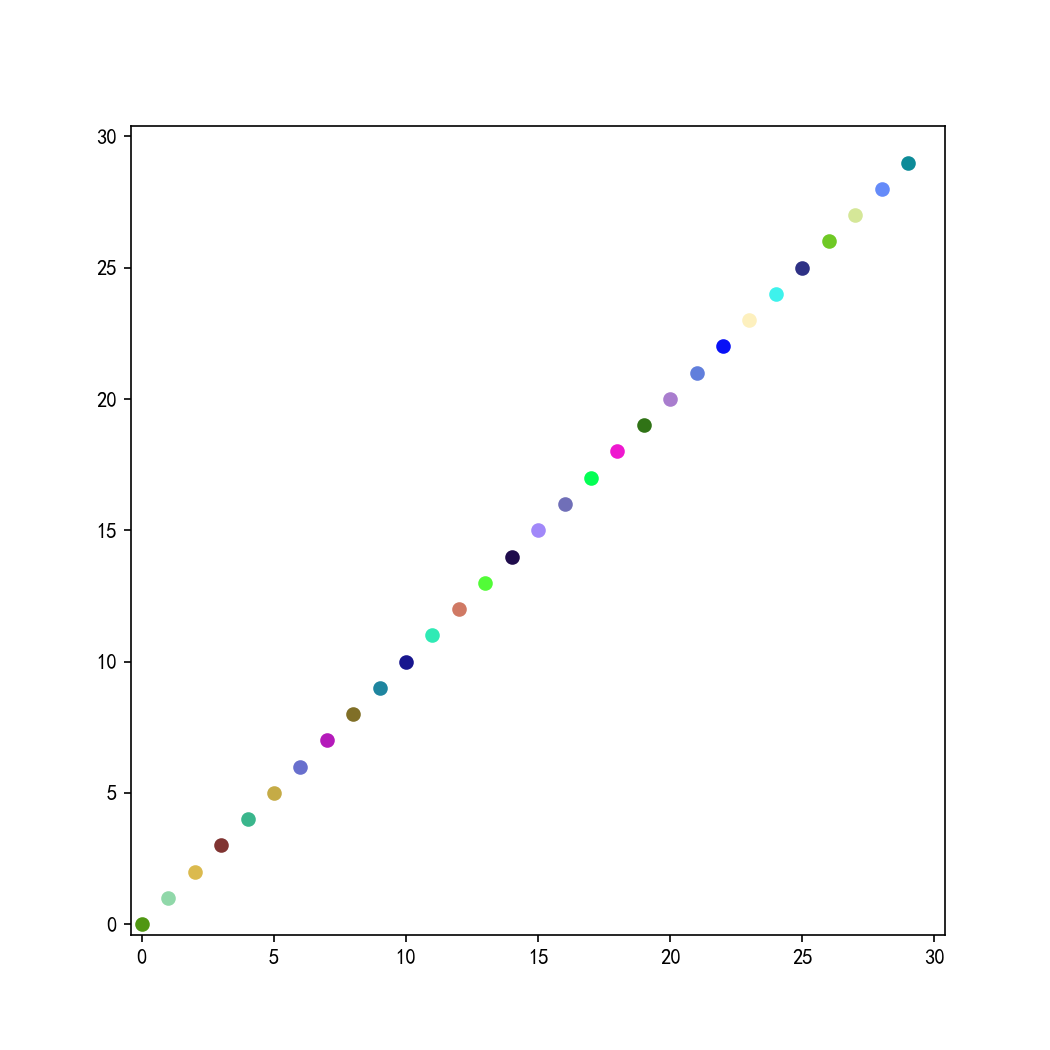

['#509712', '#90D8A9', '#DBBA4E', '#803432', '#3AB68C', '#C5AB46', '#686FCD', '#B41ABA', '#806F27', '#1E859F', '#18168E', '#2FEAB5', '#D07964', '#52FC37', '#1F0C4C', '#A188F9', '#706FB8', '#04FF54', '#EE18CF', '#307316', '#A97DCE', '#617FDC', '#0810F6', '#FDF0BE', '#3EF2EC', '#2E3185', '#6FC925', '#D5E798', '#658BF9', '#0D8B98']


In [88]:
def RC():#Random Color
    STR="#"
    for i in range(6):
        STR=STR+random.choice("0123456789ABCDEF")
    return STR

def RCset(n):
    random.seed()
    Set=set()
    for i in range(n):
        Set.add(RC())
    Set=list(Set)
#     Set.sort(reverse=True) #是否进行排序
    return Set

Set=RCset(30)
plt.figure(figsize=(7,7))
for i in range(30):
    plt.scatter(i,i,c=f"{Set[i]}")
    plt.show()
print(Set)



# > *`Julia Set`*

<IPython.core.display.Javascript object>


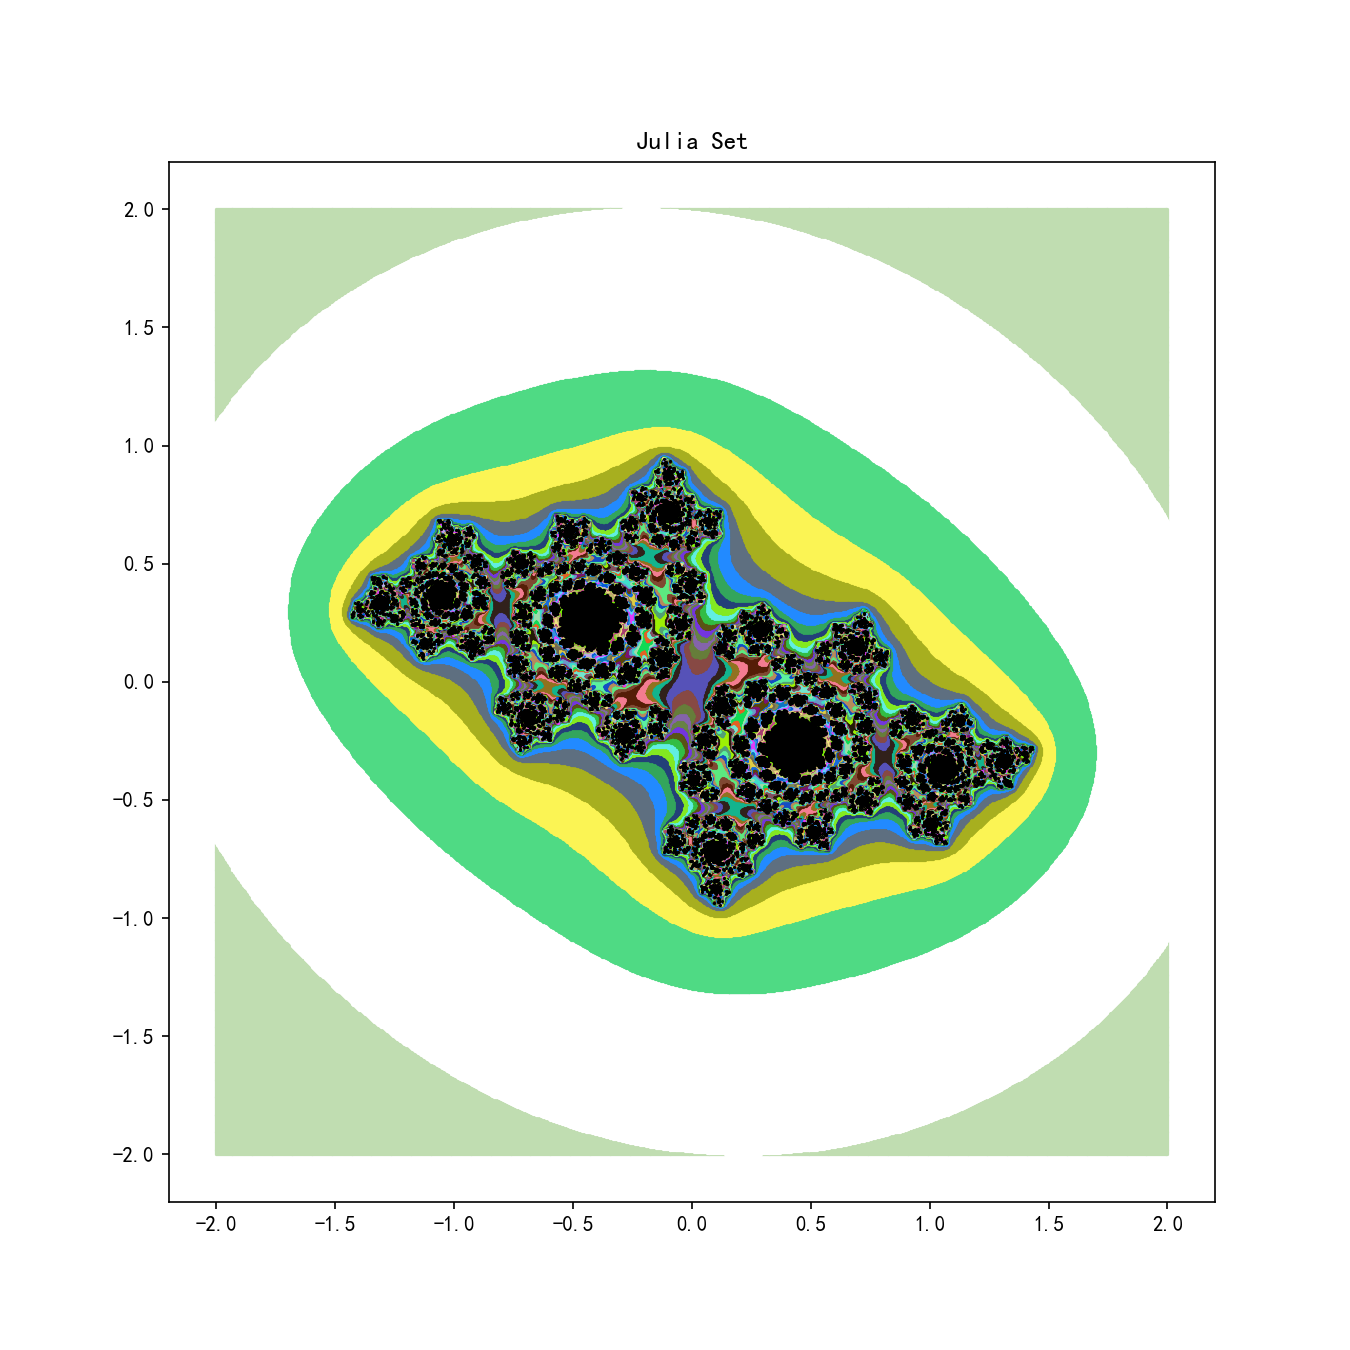

In [91]:
N=60
for i in range(N):
    exec(f"m{i}=[]")
    exec(f"n{i}=[]")
Set=RCset(N)
Set[N-1]="#000000"
Set[1]="#FFFFFF"
for m in np.linspace(-2,2,1000):
    for n in np.linspace(-2,2,1000):
        c=-0.55+0.51j
        z0=complex(m,n)
        label=-1
        for i in range(N):
            z0=z0*z0+c
            if np.abs(z0)<20:
                label+=1
            else: break
        exec(f"m{label}.append(m)")
        exec(f"n{label}.append(n)")
plt.figure(figsize=(9,9))
plt.title("Julia Set")
for i in range(N):
    exec(f"plt.scatter(m{i},n{i},s=0.3,c=Set[{i}])")
plt.show()

# > *`Mandelbrot Set`*

<IPython.core.display.Javascript object>


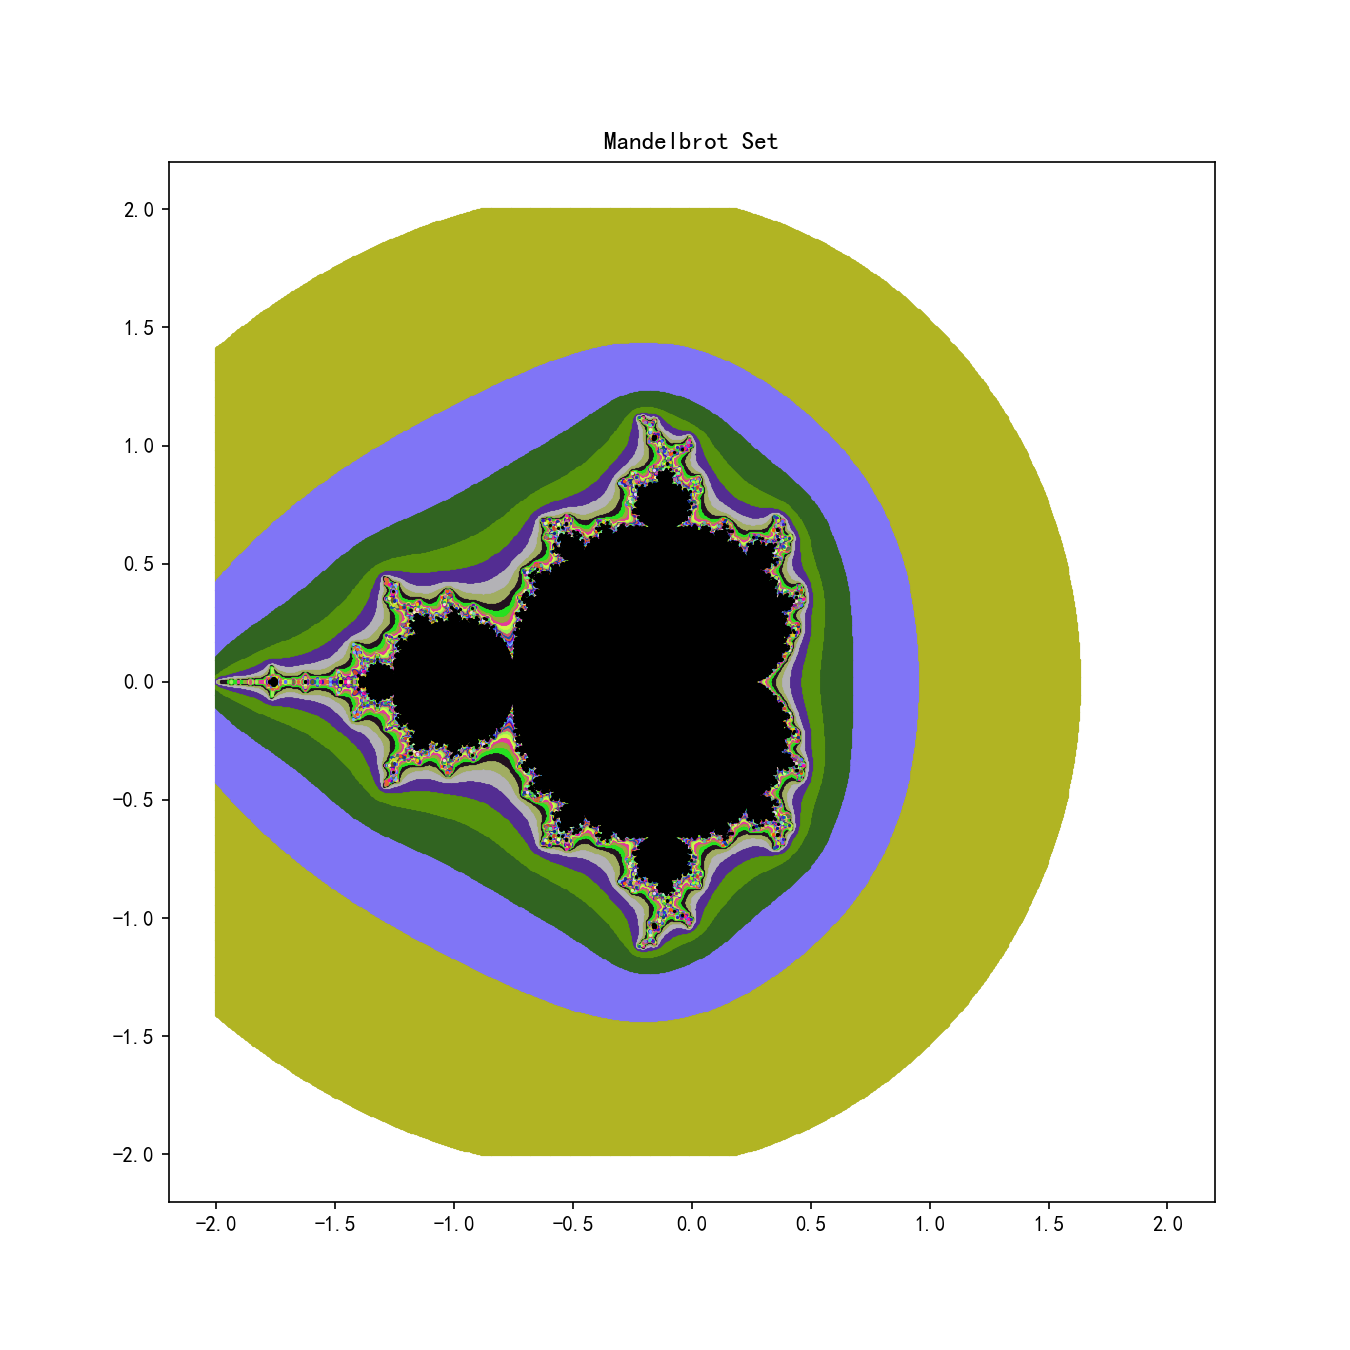

In [89]:
N=60
for i in range(N):
    exec(f"m{i}=[]")
    exec(f"n{i}=[]")
Set=RCset(N)
Set[N-1]="#000000"
Set[1]="#FFFFFF"
for m in np.linspace(-2,1.0,1000):
    for n in np.linspace(-1.5,1.5,1000):
        c=complex(m,n)
        z0=0
        label=-1
        for i in range(N):
            z0=z0*z0+c
            if np.abs(z0)<20:
                label+=1
            else: break
        exec(f"m{label}.append(m)")
        exec(f"n{label}.append(n)")
plt.figure(figsize=(9,9))
plt.title("Mandelbrot Set")
for i in range(N):
    exec(f"plt.scatter(m{i},n{i},s=0.3,c=Set[{i}])")
plt.show()

---------
--------
# 四 · 颜色匹配映射方式——色谱

# > *`Julia Set`*

In [51]:
def main_jC(m,maxit,c,R,X,Y):
    Color=sorted(plt.colormaps())
    CR=random.choice(Color)
    plt.figure(figsize=(9,9))
    plt.imshow(julia(m,c,maxit,R,X,Y),cmap=CR,extent=(X[0],X[1],Y[0],Y[1]))
    plt.show()

widgets.interact_manual(
    main_jC,
    m=widgets.IntSlider(min=100, max=20000, step=10, value=1000,description='N(分格数):'),
    c=widgets.Text(value='-0.2565+0.711j',placeholder='Type something',description='参数C:'),
    X=widgets.FloatRangeSlider(value=[-1.5,1.5],min=-3,max=3,step=0.00000000000000000001,description='X轴范围:',readout=True,readout_format='.3f',),
    Y=widgets.FloatRangeSlider(value=[-1.5,1.5],min=-3,max=3,step=0.00000000000000000001,description='Y轴范围:',readout=True,readout_format='.3f',),
    maxit=widgets.IntSlider(min=0, max=5000, step=1, value=60,description='最大循环数:'),
    R=widgets.Text(value='30',placeholder='Type something',description='限定域:')
    )

interactive(children=(IntSlider(value=1000, description='N(分格数):', max=20000, min=100, step=10), IntSlider(val…

<function __main__.main_jC(m, maxit, c, R, X, Y)>

># 例图
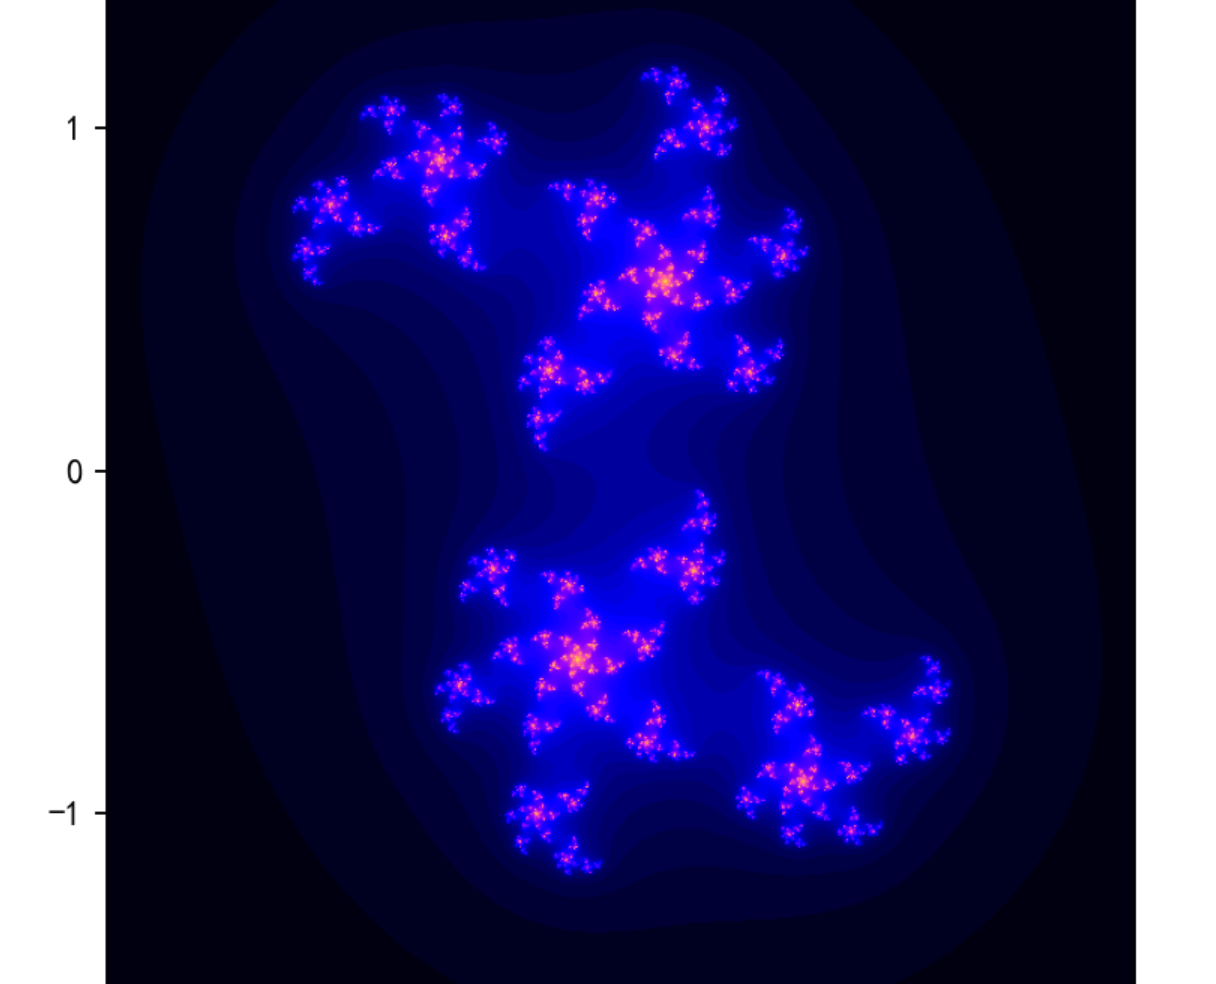

# > *`Mandelbrot Set`*

In [92]:
def main_mC(m,maxit,z,R,X,Y):
    Color=sorted(plt.colormaps())
    CR=random.choice(Color)
    plt.figure(figsize=(9,9))
    plt.imshow(mandelbrot(m,z,maxit,R,X,Y),extent=(X[0],X[1],Y[0],Y[1]),cmap=CR)
    plt.show()

widgets.interact_manual(
    main_mC,
    m=widgets.IntSlider(min=100, max=10000, step=10, value=1000,description='N(分格数):'),
    z=widgets.Text(value='0',placeholder='Type something',description='参数z:'),
    X=widgets.FloatRangeSlider(value=[-2.5,1],min=-3,max=3,step=0.00000000000000000001,description='X轴范围:',readout=True,readout_format='.3f',),
    Y=widgets.FloatRangeSlider(value=[-1.5,1.5],min=-3,max=3,step=0.00000000000000000001,description='Y轴范围:',readout=True,readout_format='.3f',),
    maxit=widgets.IntSlider(min=0, max=5000, step=1, value=60,description='最大循环数:'),
    R=widgets.Text(value='30',placeholder='Type something',description='限定域:')
    )

interactive(children=(IntSlider(value=1000, description='N(分格数):', max=10000, min=100, step=10), IntSlider(val…

<function __main__.main_mC(m, maxit, z, R, X, Y)>

># 例图
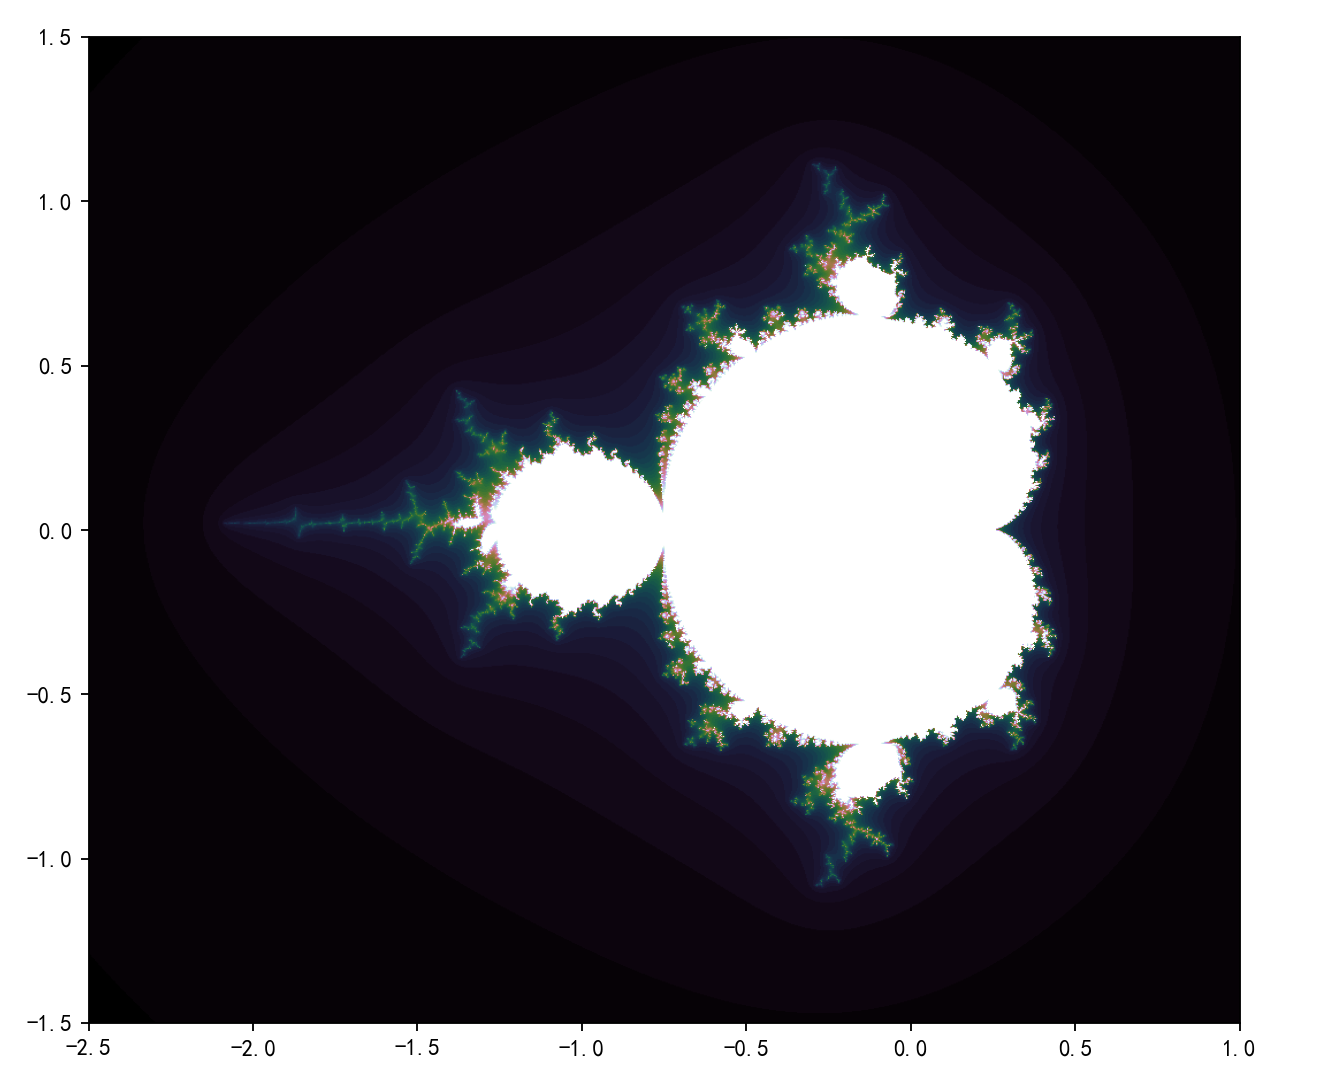

---------
--------
# 五 · 结语

## 特别鸣谢&#x1F339;&#x1F339;&#x1F339;：与刘晟翔，翁凯枫的讨论。刘晟翔同学教授了chatGPT的使用。翁凯枫同学教授了用scatter形式绘制了分形集的方法。


> # PS:出现问题请及时联系，也十分期待你们提出的建议和指导

In [75]:
# 试试这个！！！
import webbrowser
ur1="https://github.com/HUSKYzjh/ke_xue_bian_cheng"
webbrowser.open(ur1)

True

>## 另：已将各次作业上传至[GitHub](https://github.com/HUSKYzjh/ke_xue_bian_cheng)，其实已经拖了好几次o(TヘTo)

In [ ]:
# xy范围限制
x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max =  y_widget.value
y_widget.observe(update_x_range, 'value')
def update_y_range(*args):
    y_widget.min =  x_widget.value
x_widget.observe(update_y_range, 'value')

def printer(x, y):
    print(x, y)
widgets.interact(printer,x=x_widget, y=y_widget);


|<div style="width:250px" ><font size=6 >参数</font> </div> | <div style="width:600px" ><font size=6 >描述</font> </div>|
|:---------------------------:|:---------------------------|
|<div style="width:250px" ><font size=4 >自变量 [X] </font> </div> | <div style="width:600px" ><font size=4 >绘图自变量，必填</font> </div>|
|<div style="width:250px" ><font size=4 >因变量 [Y]</font> </div> | <div style="width:600px" ><font size=4 >绘图因变量，必填</font> </div>|
|<div style="width:250px" ><font size=4 >因变量 [Z]</font> </div> | <div style="width:600px" ><font size=4 >绘图因变量，选填，默认为0。</font> </div>|
|<div style="width:250px" ><font size=4 >分格 [Box]</font> </div> | <div style="width:600px" ><font size=4 >格式为[m,n]，方向先竖后横，默认为0时不启用。为1时控制图中图。</font> </div>|
|<div style="width:250px" ><font size=4 >画布大小 [Size]</font> </div> | <div style="width:600px" ><font size=4 >格式为[m,n]，先横后竖，默认(9,9)，为“True”时标识是否使用同一绘图。</font> </div>|
|<div style="width:250px" ><font size=4 >维数 [Dim]</font> </div> | <div style="width:600px" ><font size=4 >控制绘图维度，默认为二维。可选 2  or 3 。</font> </div>|
|<div style="width:250px" ><font size=4 >格内标志 [Bm]</font> </div> | <div style="width:600px" ><font size=4 >格式为[m1,m2,n1,n2,'AX_n']，默认为0不启用。先分格后标识位置及名称。</font> </div>|
|<div style="width:250px" ><font size=4 >类型 [Type]</font> </div> | <div style="width:600px" ><font size=4 >绘图函数类，目前仅支持'P'(plot)，'S'(scatter)，'H'(hist)的部分内容。</font> </div>|
|<div style="width:250px" ><font size=4 >线条数据标签 [La]</font> </div> | <div style="width:600px" ><font size=4 >字符串格式，支持format，不建议为空。</font> </div>|
|<div style="width:250px" ><font size=4 >X轴标签 [Lx]</font> </div> | <div style="width:600px" ><font size=4 >字符串格式，可LaTex。</font> </div>|
|<div style="width:250px" ><font size=4 >Y轴标签 [Ly]</font> </div> | <div style="width:600px" ><font size=4 >字符串格式，可LaTex。</font> </div>|
|<div style="width:250px" ><font size=4 >Z轴标签 [Lz]</font> </div> | <div style="width:600px" ><font size=4 >字符串格式，可LaTex。</font> </div>|
|<div style="width:250px" ><font size=4 >标题标签 [Tn]</font> </div> | <div style="width:600px" ><font size=4 >字符串格式，可LaTex。</font> </div>|
|<div style="width:250px" ><font size=4 >标签大小 [Ls]</font> </div> | <div style="width:600px" ><font size=4 >X轴、Y轴、线条标签的字体大小。</font> </div>|
|<div style="width:250px" ><font size=4 >线条粗细 [Lw]</font> </div> | <div style="width:600px" ><font size=4 >仅在“plot”下使用，默认为 1。</font> </div>|
|<div style="width:250px" ><font size=4 >线条类型 [Lm]</font> </div> | <div style="width:600px" ><font size=4 >仅在“plot”下使用，默认为实线。“hist”布尔值时控制是否频率统计。</font> </div>|
|<div style="width:250px" ><font size=4 >线条颜色 [Lc]</font> </div> | <div style="width:600px" ><font size=4 >以字符串为输入格式，默认为 黑，可利用ColorLab。</font> </div>|
|<div style="width:250px" ><font size=4 >线条透明度 [Al]</font> </div> | <div style="width:600px" ><font size=4 >输入0到1之间小数，默认为1。</font> </div>|
|<div style="width:250px" ><font size=4 >标志大小 [Ms]</font> </div> | <div style="width:600px" ><font size=4 >仅在“plot”,“scatter”下使用，默认为2。</font> </div>|
|<div style="width:250px" ><font size=4 >标志类型 [Mm]</font> </div> | <div style="width:600px" ><font size=4 >仅在“plot”,“scatter”下使用，默认为点标记。</font> </div>|
|<div style="width:250px" ><font size=4 >标志颜色 [Mc]</font> </div> | <div style="width:600px" ><font size=4 >以字符串为输入格式，默认为 黑，可利用ColorLab。</font> </div>|
|<div style="width:250px" ><font size=4 >观察视角 [AE]</font> </div> | <div style="width:600px" ><font size=4 >以为(azim,elev)为输入格式,即(水平，竖直)，默认为(30,-60)。</font> </div>|
|<div style="width:250px" ><font size=4 >返回值 [Re]</font> </div> | <div style="width:600px" ><font size=4 >默认为空,可输入字符串格式或“H”获得“hist”下的N()、BIN()、()。</font> </div>|
|<div style="width:250px" ><font size=4 >补充命令 [Other]</font> </div> | <div style="width:600px" ><font size=4 >在return前执行以字符串格式输入的命令，以“o1 = '',o2 = '',……”输入，适用于绘图要求超出本函数覆盖内容时使用。</font> </div>|

In [ ]:
# Zplt 自定义绘图函数，参数见附录
def Zplt(X,Y,Z=0,Box=0,Size=[9,9],Dim=2,Bm=0,Type="P",La="-",Lx="X",Ly="Y",Lz="Z",Tn="",Ls=15,Lw=1,Lm="-",Lc="black",Al=1,Ms=2,Mm="",Mc="black",AE=[30,-60],Re=[],**Other):

    if Bm == 0:# 正常情况，单图绘制
        if Size != True:
            plt.figure(figsize=Size)
            plt.title(Tn,size=Ls)
            plt.xlabel(Lx,size=Ls)
            plt.ylabel(Ly,size=Ls)
        if Dim == 2:# 二维图
            
            
            if Type == "P":# plot
                
                if Mm == "":# 无标志点
                    plt.plot(X,Y,color=Lc,linewidth=Lw,alpha=Al,label=La)
                
                else:# 有标志点
                    plt.plot(X,Y,color=Lc,linewidth=Lw,alpha=Al,marker=Mm,markersize=Ms,markerfacecolor=Mc,label=La)
                
            elif Type == "S": # scatter
                plt.scatter(X,Y,s=Ms,c=Mc,marker=Mm,alpha=Al,label=La)
                
            elif Type == "H":# hist
                n,bins,patches=plt.hist(X,Y,ec=Lc,fc=Mc,density=Lm,alpha=Al,label=La)
                
            plt.legend(loc="best")
            
        elif Dim == 3: 
            plt.view_init(elev=AE[0],azim=AE[1])
            
            if Size != True:
                plt.axes(projection='3d')
                plt.xlabel(Lx,size=Ls)
                plt.ylabel(Ly,size=Ls)
                plt.zlabel(Lz,size=Ls)
                
            if Type == "P":# plot
                
                if Mm == "":# 无标志点
                    plt.plot(X,Y,Z,color=Lc,linewidth=Lw,alpha=Al,label=La)
                
                else:# 有标志点
                    plt.plot(X,Y,Z,color=Lc,linewidth=Lw,alpha=Al,marker=Mm,markersize=Ms,markerfacecolor=Mc,label=La)
                
            elif Type == "S": # scatter
                plt.scatter(X,Y,s=Ms,c=Mc,marker=Mm,alpha=Al,label=La)
                
            elif Type == "H":# hist
                n,bins,patches=plt.hist(X,Y,ec=Lc,fc=Mc,density=Lm,alpha=Al,label=La)
                
            plt.legend(loc="best")            
        
    elif Bm == 1:# 分格控制
        plt.figure(figsize=Size)
        global gs
        gs = gridspec.GridSpec(Box[0],Box[1])
        plt.suptitle(Tn,size=Ls)       
        
    else:# 图中图
        Bm[4]=eval(f"plt.subplot(gs[{Bm[0]}:{Bm[1]},{Bm[2]}:{Bm[3]}])")
        
        if Dim == 2:# 二维图
            Bm[4].xlabel(Lx,size=Ls)
            Bm[4].ylabel(Ly,size=Ls)
            
            if Type == "P":# plot
                
                if Mm == "":# 无标志点
                    Bm[4].plot(X,Y,color=Lc,linewidth=Lw,alpha=Al,label=La)
                
                else:# 有标志点
                    Bm[4].plot(X,Y,color=Lc,linewidth=Lw,alpha=Al,marker=Mm,markersize=Ms,markerfacecolor=Mc,label=La)
                
            elif Type == "S": # scatter
                Bm[4].scatter(X,Y,s=Ms,c=Mc,marker=Mm,alpha=Al,label=La)
                
            elif Type == "H":# hist
                n,bins,patches=Bm[4].hist(X,Y,ec=Lc,fc=Mc,density=Lm,alpha=Al,label=La)
                
            Bm[4].legend(loc="best")
            
        elif Dim == 3: 
            
            if Size != True:
                Bm[4].axes(projection='3d')
                Bm[4].xlabel(Lx,size=Ls)
                Bm[4].ylabel(Ly,size=Ls)
                Bm[4].zlabel(Lz,size=Ls)
                
            if Type == "P":# plot
                
                if Mm == "":# 无标志点
                    Bm[4].plot(X,Y,Z,color=Lc,linewidth=Lw,alpha=Al,label=La)
                
                else:# 有标志点
                    Bm[4].plot(X,Y,Z,color=Lc,linewidth=Lw,alpha=Al,marker=Mm,markersize=Ms,markerfacecolor=Mc,label=La)
                
            elif Type == "S": # scatter
                Bm[4].scatter(X,Y,s=Ms,c=Mc,marker=Mm,alpha=Al,label=La)
                
            elif Type == "H":# hist
                n,bins,patches=Bm[4].hist(X,Y,ec=Lc,fc=Mc,density=Lm,alpha=Al,label=La)
                
            Bm[4].legend(loc="best")
            
    if len(Other) != 0:# 额外命令
        for i in range(1,len(Other)+1):
            exec(Other[f'o{i}'])
            
    #返回值
    if Re == 'H':
        return [n,bins,patches]# 频率或频数分布
    
    elif Re == 0:
        Zplt="HUSKY"
        print("QAQ,代码码不动了")
        
    elif Re != []:
        R=eval(Re)
        return R
        